# Lineer Regresyon Proje 1 - TV ~ Sales
Adevting.csv datasinda:
1. TV ~ Sales arasindaki iliskiye bakacagiz.
2. Amacimiz TV butcesi ile Satis arasindaki iliskiyi Lineer Regresyon ile modellemek.
3. Bunun icin bir lineer model kuracagiz.

Adımlar:

1. Önce Datayı ham olarak inceleyelim
2. Datayı import edeli.
3. Datayı inceleyelim (head, describe, info.
4. Datayı görselleşti.
5. Modeli oluştur (formuller.
6. Hazırlı.
7. Train-Test Spli.
8. Lineer Regresyon Modelini Çalıştır (Fit.
9. Katsayıları Hesaplama (intercept_, coef_.
10. Tahmin Yap (Predict.
11. Gerçek Data ve Tahmin Datasını Çi.
12. Hataları Çiz ($y - \hat y$.
13. Model Doğruluğunu Kontrol Et (RMSE, ve $R^2$.
14. Yorumlar

#### 1- Önce Datayı ham olarak inceleyelim
Datayı manuel kontrol:
* Sütunlar hangileri
* Feature (X) ve Label sütunu ne
* Toplam kaç kayıt var
* Eksik data var mı
    * NA (Not Available)
    * NaN: Not a Number

#### 2- Datayı import edelim

In [5]:
# paket import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# dataframe'i olustur
df_advertising = pd.read_csv('data/Advertising.csv', index_col=0)

In [7]:
# il 10 satir
df_advertising.head(10)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [8]:
# son bes satir
df_advertising.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [9]:
# genel bilgiler
df_advertising.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [10]:
# temel istatistikler
df_advertising.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## 4- Datayi Gorsellestir

In [12]:
# input - output

data = df_advertising[['TV', 'sales']]

# input -> feature X
X = data['TV']

# output -> label y
y = data['sales']

In [13]:
# X type
type(X)

pandas.core.series.Series

In [14]:
# y'nin tipi
type(y)

pandas.core.series.Series

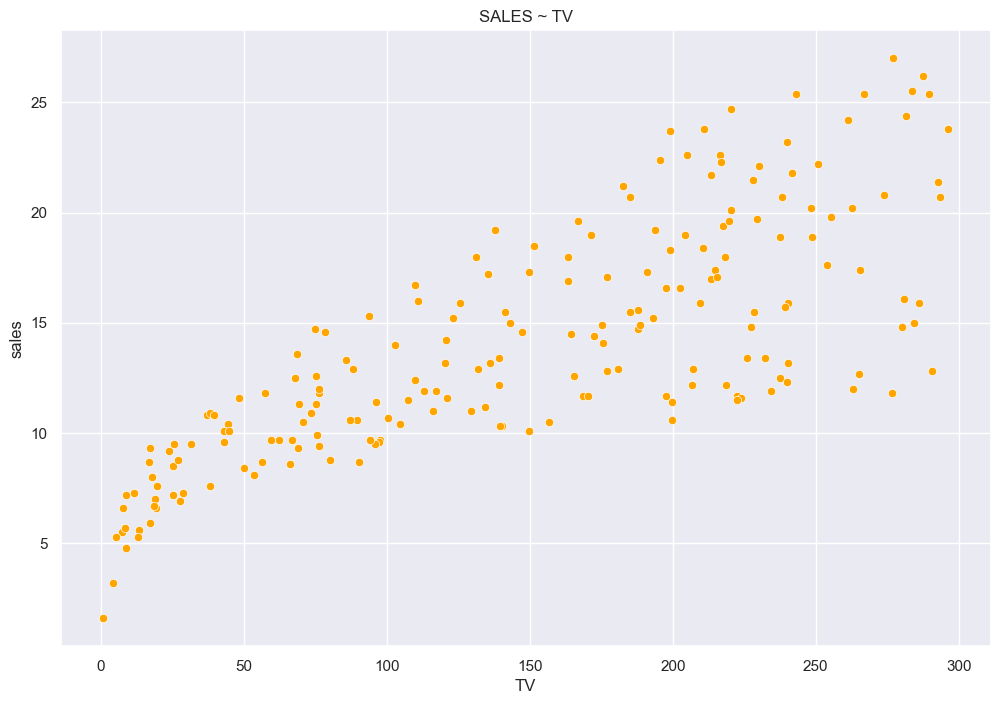

In [15]:
# grafik ciz
sns.set_theme(style='darkgrid')
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='TV', y='sales', color='orange')
plt.title('SALES ~ TV')
plt.show()

## Modeli Olustur

$$ y = \beta_0 + \beta_1X $$

Machine Learning'de dünyada en yaygın kullanılan Python paketi: **Scikit-Learn**

Scikit-Learn yükleme için:

`conda install -c anaconda scikit-learn`

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [17]:
# import
from sklearn.linear_model import LinearRegression

In [18]:
# Linear Regresyon nesnesini olustur
lr = LinearRegression()

## 6- Hazirlik
Boyut kontrolü yapmamız lazım.
shape -> `(n_samples, n_features)`

shape -> `(n, p)`

In [20]:
# input ve oputput boyut
print(X.shape)
print(y.shape)

(200,)
(200,)


In [21]:
# yeniden boyutlandiralim
X = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

In [22]:
# input ve oputput boyut
print(X.shape)
print(y.shape)

(200, 1)
(200, 1)


## 7 - Train-Test Split

Toplam 200 verimizi Train-Test olarak ikiye ayıracağız.

Train: %70

Test: %30

Train Data: X_train, y_train

Test Data: X_test, y_test

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [26]:
# sklearn den import
from sklearn.model_selection import train_test_split

In [27]:
# train data
# X_train, y_train

# test data
# X_test, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [28]:
# şekiller

print("X_train'in boyutu:", X_train.shape)
print("y_train'in boyutu:", y_train.shape)

print("X_test'in boyutu:", X_test.shape)
print("y_test'in boyutu:", y_test.shape)

X_train'in boyutu: (140, 1)
y_train'in boyutu: (140, 1)
X_test'in boyutu: (60, 1)
y_test'in boyutu: (60, 1)


In [29]:
# X_train'in tipi

type(X_train)

numpy.ndarray

#### 8- Lineer Regresyon Modelini Çalıştır (Fit)

In [31]:
# regresyonu calistir -> fit
# fit -> ogrenme
# train data uzerinden

lr.fit(X_train, y_train)

LinearRegression()

#### 9- Katsayıları Hesaplama (intercept_, coef_)

Lineer Regresyonu fit etmenin amacı katsayıları hesaplamaktır.

$\beta_0$ -> intercept

$\beta_1$ -> slope (coefficient)

In [34]:
# intercept -> beta - 0

print('intercept:', lr.intercept_)

intercept: [6.98966586]


In [35]:
# slope = coefficient -> beta 1

print('slope (coeffificent) eğim:', lr.coef_)

slope (coeffificent) eğim: [[0.04649736]]


In [36]:
print(f'y = {lr.intercept_[0]:.5} + {lr.coef_[0][0]:.5}X')

y = 6.9897 + 0.046497X


$$ y = 6.989 + 0.0464 X $$

#### 10- Tahmin Yap (Predict)

Artık regresyon katsayılarımızı hesapladığımıza göre, test datası (X_test) üzerinden y'leri tahmin edebiliriz.

`y_pred`

Gerçek y'ler y_test olarak duruyor.

Onları tahminimizin doğruluğunu kontrol ederken kullanacağız. 

In [40]:
# tahmin yap

y_pred = lr.predict(X_test)

In [41]:
# tahmini yazdir
y_pred

array([[ 7.35234526],
       [18.06533671],
       [13.27610876],
       [17.11214086],
       [18.22807747],
       [16.60531965],
       [13.4620982 ],
       [16.17754395],
       [17.05169429],
       [17.07029323],
       [12.4391563 ],
       [17.66080969],
       [ 9.60281742],
       [15.72186983],
       [11.04423554],
       [11.36971705],
       [13.95032046],
       [14.90351632],
       [14.59198401],
       [12.23921766],
       [16.97264878],
       [13.00642408],
       [16.07524976],
       [15.21969836],
       [15.58702749],
       [17.23303399],
       [17.20978531],
       [10.49091697],
       [15.58702749],
       [12.71349072],
       [10.1700852 ],
       [10.19798361],
       [12.61584627],
       [15.74976825],
       [ 9.31453379],
       [12.59259759],
       [11.50920913],
       [14.81982107],
       [17.33067844],
       [15.97295557],
       [17.00519693],
       [15.15925179],
       [14.63848137],
       [17.14933874],
       [12.57864838],
       [11

In [42]:
# tahmin datasının şekli

y_pred.shape

(60, 1)

In [43]:
# test datasının (orjinal data) şekli
# y_true

y_test.shape

(60, 1)

#### 11- Gerçek Data ve Tahmin Datasını Çiz

Artık test datadan yani gerçek dünyadan bahsediyoruz.

Train ile işimiz bitti. Yani öğrendik.

Gerçek Label -> y_test

Tahmin Label -> y_pred

Input -> X_test

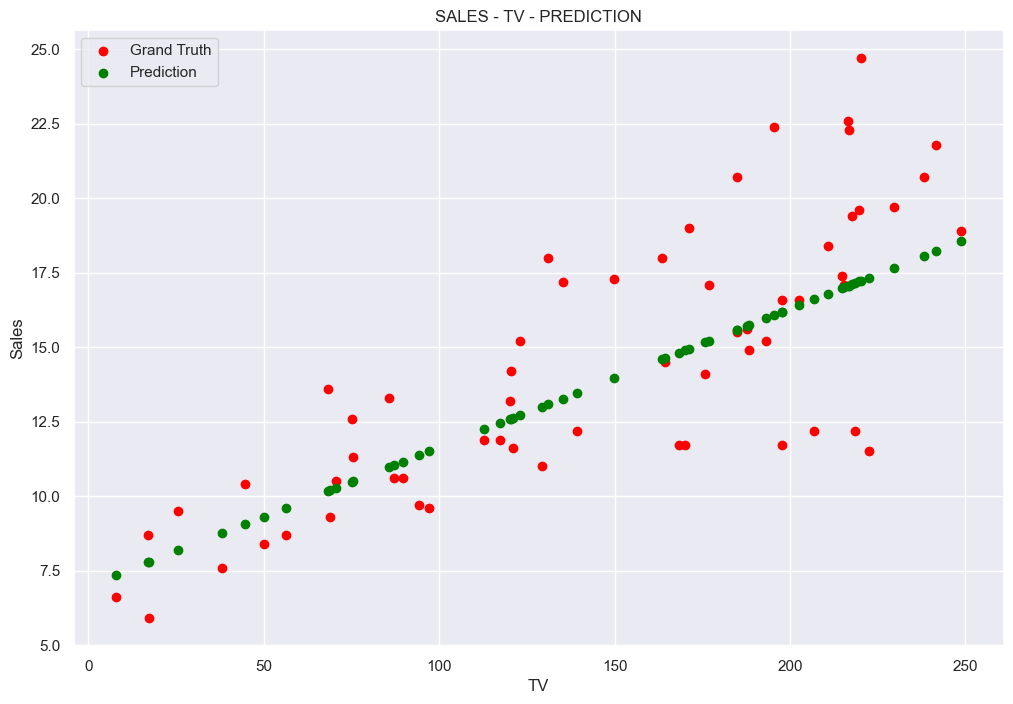

In [46]:
# Gerçek Data -> Grand Truth
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X_test, y_test, label='Grand Truth', color='red')

# Tahmin -> Prediction
ax.scatter(X_test, y_pred, label='Prediction', color='green')

plt.title('SALES - TV - PREDICTION')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend(loc='upper left')
plt.show()

In [47]:
# ilk 10 gerçek y değerini görelim

y_test[0:10]

array([[ 6.6],
       [20.7],
       [17.2],
       [19.4],
       [21.8],
       [12.2],
       [12.2],
       [11.7],
       [22.6],
       [22.3]])

In [48]:
# ilk 10 tahmin değerini görelim

y_pred[0:10]

array([[ 7.35234526],
       [18.06533671],
       [13.27610876],
       [17.11214086],
       [18.22807747],
       [16.60531965],
       [13.4620982 ],
       [16.17754395],
       [17.05169429],
       [17.07029323]])

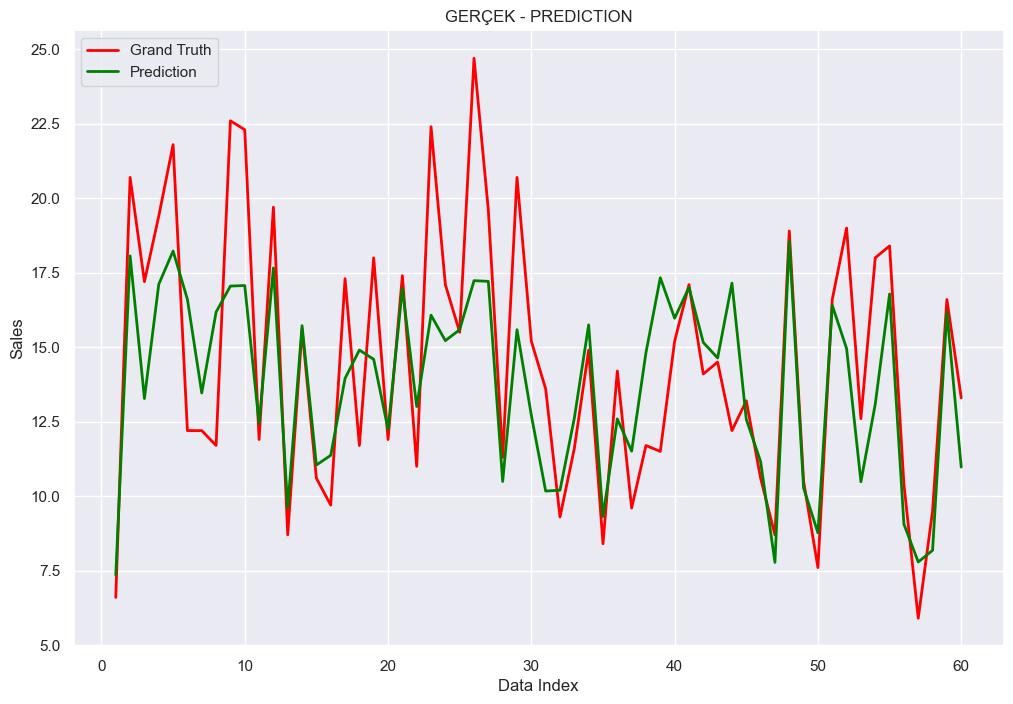

In [49]:
# Her bir tahmin noktasındaki değişimi görelim
indexler = range(1,61)

# Gerçek Data -> Grand Truth
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(indexler, y_test, label='Grand Truth', color='red', linewidth=2)

# Tahmin -> Prediction
ax.plot(indexler, y_pred, label='Prediction', color='green', linewidth=2)

plt.title('GERÇEK - PREDICTION')
plt.xlabel('Data Index')
plt.ylabel('Sales')
plt.legend(loc='upper left')
plt.show()

#### 12- Hataları Çiz ($y - \hat y$)

Hata : Residual -> ($y - \hat y$)

**y_test - y_pred**

In [52]:
import numpy as np

In [53]:
len(y_test - y_pred)

60

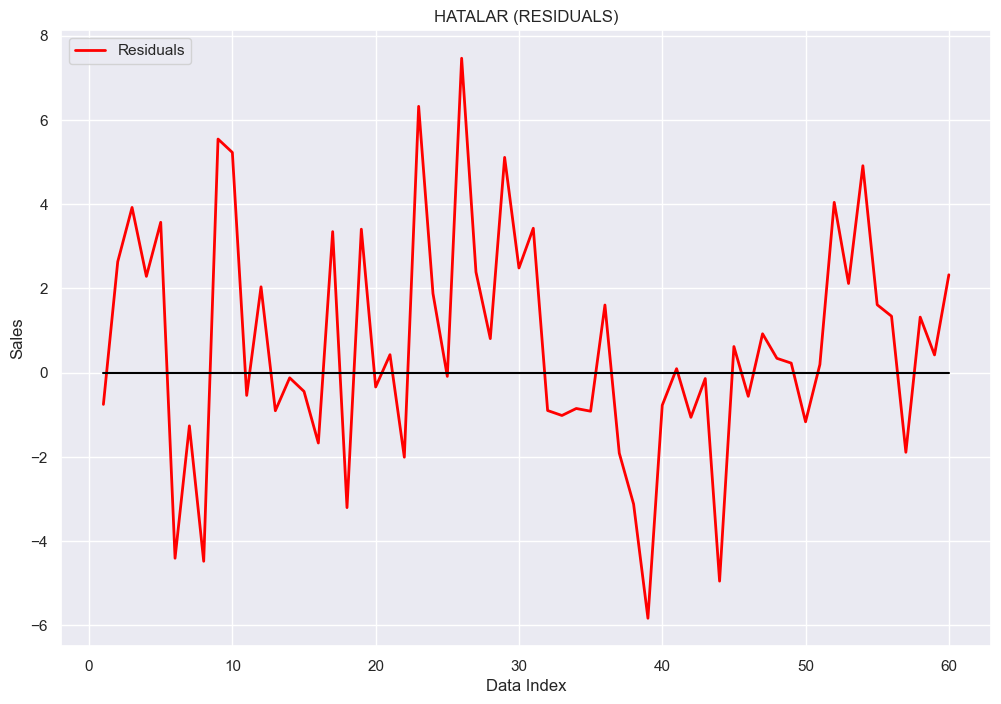

In [54]:
# Her bir tahmin noktasındaki hatayı görelim
indexler = range(1,61)

# Residuls -> Hatalar
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(indexler, y_test - y_pred, label='Residuals', color='red', linewidth=2)

# sıfır doğrusunu çiz
ax.plot(indexler, np.zeros(len(y_test - y_pred)), color='black')

plt.title('HATALAR (RESIDUALS)')
plt.xlabel('Data Index')
plt.ylabel('Sales')
plt.legend(loc='upper left')
plt.show()

#### 13- Model Doğruluğunu Kontrol Et (RMSE, ve $R^2$)

**RMSE**: Root Mean Squared Error

Daha önce gördüğümüz MSE'nin karekökü aslında.

$R^2$: `coefficient of determination`.

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [58]:
# sklearn import

from sklearn.metrics import r2_score, mean_squared_error

In [59]:
# R^2 yi hesaplayalım

r_2 = r2_score(y_test, y_pred)

In [60]:
# R^2 yazdır

print('R^2:', r_2)

R^2: 0.5942987267783302


In [61]:
# R^2 % olarak yazdır

print('R^2 %:', r_2 * 100)

R^2 %: 59.42987267783302


In [62]:
# MSE -> RMSE

mse = mean_squared_error(y_test, y_pred)

In [63]:
# MSE'yi yazdır

print('MSE:', mse)

MSE: 7.975798532854851


In [64]:
# RMSE

import math
rmse = math.sqrt(mse)

In [65]:
# RMSE'yi yazdır

print('RMSE:', rmse)

RMSE: 2.8241456288327007


#### 14- Yorumlar

**$R^2$ = %59.43**

çıktı

Yani neredeyse, %60.

Bu şu demek:

Bizim modelimiz gerçek datayı %60 oranında temsil ediyor. Fena değil oran. Tabi domain'e (alan) göre değişir.

**RMSE = 2.82**

çıktı.

Bu şu demek:

Modelimiz ortalamada 2.82'lık bir hata yapıyor tahmin ederken.

Örneğin, 

gerçek değer = 22.3 

iken 

tahmin = 17.07

çıkmıştı.